In this section the Fourth Order Runge Kutta method is derived and applied to the Lorenz system to create an approximation of the function. This approximation is visualized using matplot.lib

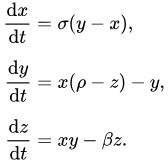

In [ ]:
!pip install nolds

In [ ]:
import numpy as np
from scipy.interpolate import make_interp_spline
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import nolds
from sklearn import preprocessing
from mpl_toolkits import mplot3d
from scipy.interpolate import splprep, splev



In [ ]:
'''

Set of several chaos metrics to characterize the visualized chaotic system

'''


def chaos_metrics(data):
  h = nolds.hurst_rs(data)
  rl = nolds.lyap_r(data)
  el = nolds.lyap_e(data)
  fd = nolds.corr_dim(data, 1)
  entropy = nolds.sampen(data)

  print("Hurst from nolds custom library", h)
  print("Rosenstein Lyapunov estimation from nolds custom library", rl)
  print("Eckmann Lyapunov estimation from nolds custom library", el)
  print("Fractal Dimension from nolds library", fd)
  print("Entropy from nolds library", entropy)

In [ ]:
'''

Functions for Lorenz system

Inputs : A set of values and hyperparameters
Outputs : The derivatives of the system defined by the lorenz function

'''


class Lorenz_System():
  def f_values(self, t, x, y, z, sig=.1):
    return sig*(y-z)
  def g_values(self, t, x, y, z, p=.1):
    return x*(p - z)-y
  def v_values(self, t, x, y, z, b=.1):
    return x*y - b*z



In [ ]:
'''

Functions for Roessler system

Inputs : A set of values and hyperparameters
Outputs : The derivatives of the system defined by the roessler function


'''

class Roessler_System():
  def f_values(t, x, y, z):
    return -(y+z)
  def g_values(t, x, y, z, a=.1):
    return x+a*y
  def v_values(t, x, y, z, b=.1, c=.1):
    return b+(x-c)*z

In [ ]:
'''

Calculates the k value given a list of functions defined by the differential equation.

Inputs : List of functions, list of points ex. (t0, x0, y0,...), (t1, x1, y1,...), ... etc
Outputs : List of K values for each respectives function

'''

def calculate_k(functions, initial_conditions, h, hyper_parameters):
  t_o = initial_conditions[0]
  x_o = initial_conditions[1]
  y_o = initial_conditions[2]
  z_o = initial_conditions[3]

  x_function = functions[0]
  y_function = functions[1]
  z_function = functions[2]


  k1 = h*x_function(t=t_o, x=x_o, y=y_o, z=z_o,sig= hyper_parameters[0])
  l1 = h*y_function(t_o, x_o, y_o, z_o, hyper_parameters[1])
  w1 = h*z_function(t_o, x_o, y_o, z_o, hyper_parameters[2])

  k2 = h*x_function(t_o+h/2, x_o+k1/2, y_o+l1/2, z_o+w1/2,  hyper_parameters[0])
  l2 = h*y_function(t_o+h/2, x_o+k1/2, y_o+l1/2, z_o+w1/2,  hyper_parameters[1])
  w2 = h*z_function(t_o+h/2, x_o+k1/2, y_o+l1/2, z_o+w1/2,  hyper_parameters[2])

  k3 = h*x_function(t_o+h/2, x_o+k2/2, y_o+l2/2, z_o+w2/2,  hyper_parameters[0])
  l3 = h*y_function(t_o+h/2, x_o+k2/2, y_o+l2/2, z_o+w2/2, hyper_parameters[1])
  w3 = h*z_function(t_o+h/2, x_o+k2/2, y_o+l2/2, z_o+w2/2, hyper_parameters[2])


  k4 = h*x_function(t_o+h, x_o+k3, y_o+l3, z_o+w3,  hyper_parameters[0])
  l4 = h*y_function(t_o+h, x_o+k3, y_o+l3, z_o+w3,  hyper_parameters[1])
  w4 = h*z_function(t_o+h, x_o+k3, y_o+l3, z_o+w3, hyper_parameters[2])



  return [k1 + 2*k2 + 2*k3 + k4,l1 + 2*l2 + 2*l3 + l4, w1 + 2*w2 + 2*w3 + w4]



In [ ]:
'''

Calculates the approximate n+1 value of the set of equations X, Y, Z from the initial conditions and set of derivative functions

Inputs : List of functions, list of points (tn, xn, yn,...)
Outputs : List of approximate values of Xn+1, Yn+1, Zn+1


'''

def approximate_function(functions, position, t, h=.001, hyper_parameters=[.001, .001, .001]):
  next_values = [t]
  k = calculate_k(functions, position, h, hyper_parameters)
  for i in range(len(functions)):
    next_values.append(position[i] + k[i]/6)
  return next_values



In [ ]:
'''

Loops through t values and calculates approximate points for Lorenz System

'''

system = Lorenz_System()

functions = [system.f_values, system.g_values, system.v_values]
initial_conditions = [0, 0.01, 0, 0]
N = 1000
h = .01

t_values = list(range(0, N, 1))
#t_values =  [x / float(N) for x in t_values]
values = []
#                  sig p  B
hyper_parameters = [10, 28, 8/3.0]

point = [0, 0, 0, 0]
for t in t_values:
  if t == t_values[0]:
    point = approximate_function(functions, initial_conditions, t, h, hyper_parameters)
    values.append(point)
  else:
    next_point = approximate_function(functions, point, t, h,hyper_parameters)
    point = next_point
    values.append(point)





In [ ]:
'''

Break down values list into x-z, x-y, y-z values

'''
t_values = []
x_values = []
y_values = []
z_values = []

for i in range(5, len(values)):
  t_values.append(values[i][0])
  x_values.append(values[i][1])
  y_values.append(values[i][2])
  z_values.append(values[i][3])

t_values = np.array(t_values)
x_values = np.array(preprocessing.scale(x_values))
y_values = np.array(preprocessing.scale(y_values))
z_values = np.array(preprocessing.scale(z_values))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:240: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:240: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(


In [ ]:
'''

Output of several chaos metrics applied to the x,y,z values of the Lorenz System

'''

# Chaotic Metrics
print('x_values chaos')
chaos_metrics(x_values)
print('y_values chaos')
chaos_metrics(y_values)
print('z_values chaos')
chaos_metrics(z_values)

x_values chaos


ValueError: ignored

In [ ]:
'''

The following plots the Lorenz System in the X-Y, X-Z, Y-Z plane respectively

'''


# X-Y Plot
tck, u = splprep([x_values, y_values], s=1)
u_new = np.linspace(0, 1, len(t_values))
x_new, y_new = splev(u_new, tck)
plt.plot(x_new, y_new, 'b-', label='X-Y Plot',  linewidth=0.5)
plt.title('X-Y Lorenz')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

#X-Z Plot
tck, u = splprep([x_values, z_values], s=1)
u_new = np.linspace(0, 1, len(t_values))
x_new, z_new = splev(u_new, tck)
plt.plot(x_new, z_new, 'b-', label='X-Z Plot',  linewidth=0.5)
plt.title('X-Z Lorenz')
plt.xlabel('X')
plt.ylabel('Z')
plt.show()

#Y-Z Plot
tck, u = splprep([y_values, z_values], s=1)
u_new = np.linspace(0, 1, len(t_values))
y_new, z_new = splev(u_new, tck)
plt.plot(y_new, z_new, 'b-', label='y-Z Plot', linewidth=0.5)
plt.title('Y-Z Lorenz')
plt.xlabel('Y')
plt.ylabel('Z')
plt.show()


In [ ]:
'''

3D Plot of the Lorenz System

'''

tck, u = splprep([x_values, y_values, z_values], s=1)
u_new = np.linspace(0, 1, len(t_values))

x_new, y_new, z_new = splev(u_new, tck)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot(x_new, y_new, z_new, 'b-', label='Smooth Curve',  linewidth=0.5)